In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [9]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

width=200
height=200

Data=[]
for i in range(1,101):
  img = '/content/drive/My Drive/DataSet/Face/' + str(i) + '.jpg'
  im=cv2.imread(img)
  im=cv2.resize(im,(width,height))
  Data.append(im)

In [24]:
def Sketch_Convertor(image):
  grey_Filter=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
  invert=cv2.bitwise_not(grey_Filter)
  blur=cv2.GaussianBlur(invert,(21,21),0)
  Invertedblur=cv2.bitwise_not(blur)
  Sketch_Filter=cv2.divide(grey_Filter,Invertedblur,scale=256)
  return Sketch_Filter

In [25]:
Sketch_Filter=Sketch_Convertor(im)



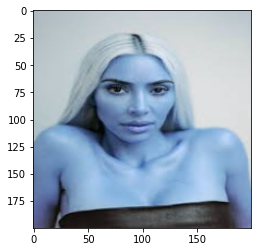

Pencil Drawing


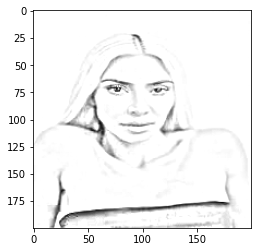

In [26]:
Sketch_Filter=Sketch_Convertor(im)
imgplot = plt.imshow(im)
plt.gray()
plt.show()
print('Pencil Drawing')
imgplot = plt.imshow(Sketch_Filter)
plt.gray()
plt.show()

In [27]:
Target=[]
counter=1
idx_Class=0
for i in range(1,101):
  if(counter==21):
    counter=1
    idx_Class=idx_Class+1
  Target.append(idx_Class)
  counter=counter+1


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Data, Target, test_size=0.3, random_state=42)

In [29]:
import numpy as np

In [30]:
X_train=np.array(X_train)
X_test=np.array(X_test)

In [35]:
X_train = X_train.reshape(len(X_train), width,height,3)
X_test = X_test.reshape(len(X_test), width,height,3)

In [36]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [37]:
def plot_history(net_history):
    history = net_history.history
    import matplotlib.pyplot as plt
    losses = history['loss']
    val_losses = history['val_loss']
    accuracies = history['accuracy']
    val_accuracies = history['val_accuracy']
    
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(losses)
    plt.plot(val_losses)
    plt.legend(['loss', 'val_loss'])
    
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(accuracies)
    plt.plot(val_accuracies)
    plt.legend(['acc', 'val_acc'])

In [ ]:
'''
How can I fight overfitting?
1- Get more data (or data augmentation)
2- Dropout (see paper, explanation, dropout for cnns)
3- DropConnect.
4- Regularization (see my masters thesis, page 85 for examples)
5- Feature scale clipping.
6- Global average pooling.
7- Make network smaller.
8- Early stopping.

'''


# How can I fight overfitting?
# 1- Get more data (or data augmentation)
# 2- Dropout (see paper, explanation, dropout for cnns)
# 3- DropConnect.
# 4- Regularization (see my masters thesis, page 85 for examples)
# 5- Feature scale clipping.
# 6- Global average pooling.
# 7- Make network smaller.
# 8- Early stopping.


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 100, 100, 16)     0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 100, 100, 16)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 dropout_4 (Dropout)         (None, 50, 50, 32)        0         
                                                           

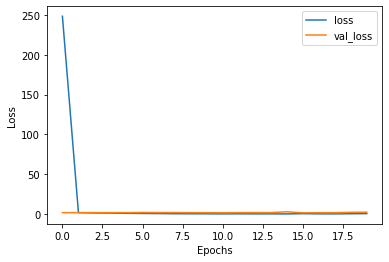

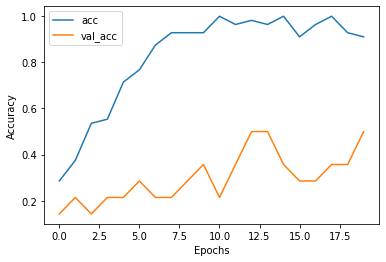

In [39]:
#==================================================
# Creating our model
from keras.models import Model
from keras import layers
import keras

myInput = layers.Input(shape=(width,height,3))
conv1 = layers.Conv2D(16, 3, activation='relu', padding='same')(myInput)
maxpool1=layers.MaxPooling2D(2)(conv1)
drop1=layers.Dropout(0.2)(maxpool1)
conv2 = layers.Conv2D(32, 3, activation='relu', padding='same', strides=2)(drop1)
drop2=layers.Dropout(0.2)(conv2)
conv3 = layers.Conv2D(64, 3, activation='relu', padding='same')(drop2)
maxpool2=layers.MaxPooling2D(2)(conv3)
drop3=layers.Dropout(0.2)(maxpool2)

flat = layers.Flatten()(drop3)
dns1=layers.Dense(100, activation='relu')(flat)
out_layer = layers.Dense(5, activation='softmax')(dns1)

myModel = Model(myInput, out_layer)

myModel.summary()
myModel.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

#==================================================
# Train our model
network_history = myModel.fit(X_train, Y_train, batch_size=2, epochs=20, validation_split=0.2)
plot_history(network_history)

In [40]:
test_labels_p = myModel.predict(X_test)
import numpy as np
Out_CONV = np.argmax(test_labels_p, axis=1)

1/1 [==============================] - 1s 559ms/step


[[1 1 0 2 3]
 [0 0 1 2 3]
 [0 1 3 1 1]
 [0 1 0 4 1]
 [0 0 1 2 2]]
 


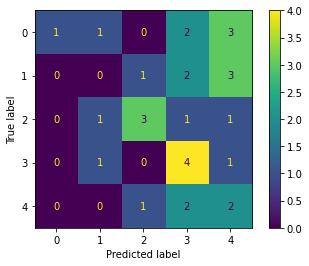

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
print(confusion_matrix(y_test,Out_CONV))
print(' ')
cm_display=ConfusionMatrixDisplay(confusion_matrix(y_test,Out_CONV))
cm_display.plot()
plt.show()

In [42]:
from sklearn.metrics import classification_report, accuracy_score
print('Accuracy= ' + str(round(accuracy_score(y_test, Out_CONV)*100))) 

Accuracy= 33


In [43]:
print(classification_report(y_test,Out_CONV))

              precision    recall  f1-score   support

           0       1.00      0.14      0.25         7
           1       0.00      0.00      0.00         6
           2       0.60      0.50      0.55         6
           3       0.36      0.67      0.47         6
           4       0.20      0.40      0.27         5

    accuracy                           0.33        30
   macro avg       0.43      0.34      0.31        30
weighted avg       0.46      0.33      0.31        30

